# CypherByte Technologies Internship

# Task 1 :Spam email detection

# spam email detection with machine learning

We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, I used Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Lets get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
spam_email = pd.read_csv("Spam Email Detection - spam.csv")
spam_email.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam_email = spam_email.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [4]:
spam_email.columns = ['Category', 'Messsage']

In [5]:
spam_email.head()

,Category,Messsage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam_email.describe()

,Category,Messsage
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
spam_email.shape

(5572, 2)

In [8]:
spam_data = spam_email.where((pd.notnull(spam_email)), '')

In [9]:
spam_data.head()

,Category,Messsage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Messsage  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
spam_data.shape

(5572, 2)

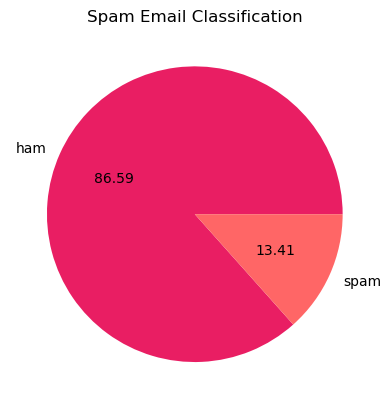

In [35]:
plt.title("Spam Email Classification")
colors = ['#E91E63', '#001F3F'] 
plt.pie(spam_data['Category'].value_counts(), labels = ['ham','spam'],autopct='%0.2f', colors=colors)
plt.show()

In [17]:
spam_data.loc[spam_email['Category'] == 'spam' , 'Category',] = 0
spam_data.loc[spam_email['Category'] == 'ham' , 'Category',] = 1

In [18]:
X = spam_data['Messsage'] 

Y = spam_data['Category']

In [19]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Messsage, Length: 5572, dtype: object


In [20]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2 , random_state = 3)

In [22]:
features_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english' , lowercase = True)

X_train_features = features_extraction.fit_transform(X_train)
X_test_features = features_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train_features , Y_train)

LogisticRegression()

In [25]:
prediction_on_training = model.predict(X_train_features)
accuracy_on_training = accuracy_score(Y_train,prediction_on_training)

In [26]:
print("Accuracy on training data : " , accuracy_on_training)

Accuracy on training data :  0.9661207089970832


In [27]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [28]:
print("Accuracy on test data : ", accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#Sample data for illustration
inputmail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfill my promise."]

# Sample training data 
training_data = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfill",
                 "get a free gift now! Click here.",
                 "Congratulations, you've won a lottery.",
                 "Meeting postponed",
                 "Invest in this amazing opportunity today."]

labels1 = [0,1,1,0,1] # 0 : ham mail , 1 : Spam mail

# feature extraction
features_extraction = CountVectorizer()
input_data_features = features_extraction.fit_transform(training_data)

#Train a Naive Bayes Classifier
model_1 = MultinomialNB()
model_1.fit(input_data_features, labels1)

# Convert the input mail to feature vectors
input_data_features = features_extraction.transform(inputmail)
prediction = model_1.predict(input_data_features)

# Display the prediction
if prediction[0] == 0:
    print("ham mail")
else:
    print("spam mail")


ham mail
